# Proyecto de Análisis de datos NBA por posición

Este proyecto se basa en analizar un archivo .csv que tiene datos sobre jugadores NBA, y hacer una limpieza, un análisis y una visualización de estos datos, creando un nuevo dataset agrupando los datos por los 30 equipos de la NBA que existen actualmente, y las cuales están divididas por 2 conferencias. la conferencia Este y la conferencia Oeste, y cada conferencia consta de 15 equipos de esos 30. Sabiendo esto vamos a analizar y visualizar un par de métricas para poder ver que equipo fue el mejor en ese área, y también que conferencia.

Empezamos importando las librerías que utilizarémos

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Abrimos el archivo .csv con el que vamos a trabajar

In [122]:
df=pd.read_csv("Player Totals.csv")

Verifico que se halla abierto el archivo y me fijo como vienen los datos

In [123]:
df.head()

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,...,ft_percent,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,31136,2024,5025,A.J. Green,NaN,SG,24.0,2,NBA,MIL,...,0.895,9.0,55.0,64.0,30,9.0,4.0,12.0,49,252
1,31137,2024,5026,A.J. Lawson,NaN,SG,23.0,2,NBA,DAL,...,0.652,14.0,36.0,50.0,20,10.0,3.0,14.0,22,136
2,31138,2024,5027,AJ Griffin,NaN,SF,20.0,2,NBA,ATL,...,1.000,2.0,16.0,18.0,5,1.0,2.0,8.0,6,48
3,31139,2024,4219,Aaron Gordon,NaN,PF,28.0,10,NBA,DEN,...,0.658,174.0,297.0,471.0,259,56.0,45.0,105.0,142,1013
4,31140,2024,4582,Aaron Holiday,NaN,PG,27.0,6,NBA,HOU,...,0.921,23.0,100.0,123.0,140,42.0,6.0,53.0,125,514


Me fijo las columnas para ver cuantas son y cuales me sirven para este análisis

In [124]:
df.columns

Index(['seas_id', 'season', 'player_id', 'player', 'birth_year', 'pos', 'age',
       'experience', 'lg', 'tm', 'g', 'gs', 'mp', 'fg', 'fga', 'fg_percent',
       'x3p', 'x3pa', 'x3p_percent', 'x2p', 'x2pa', 'x2p_percent',
       'e_fg_percent', 'ft', 'fta', 'ft_percent', 'orb', 'drb', 'trb', 'ast',
       'stl', 'blk', 'tov', 'pf', 'pts'],
      dtype='object')

Veo si hay nulos en algunas columnas, y si, hay nulos en algunas columnas

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31870 entries, 0 to 31869
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   seas_id       31870 non-null  int64  
 1   season        31870 non-null  int64  
 2   player_id     31870 non-null  int64  
 3   player        31870 non-null  object 
 4   birth_year    2870 non-null   float64
 5   pos           31870 non-null  object 
 6   age           31848 non-null  float64
 7   experience    31870 non-null  int64  
 8   lg            31870 non-null  object 
 9   tm            31870 non-null  object 
 10  g             31870 non-null  int64  
 11  gs            23233 non-null  float64
 12  mp            30787 non-null  float64
 13  fg            31870 non-null  int64  
 14  fga           31870 non-null  int64  
 15  fg_percent    31713 non-null  float64
 16  x3p           25518 non-null  float64
 17  x3pa          25518 non-null  float64
 18  x3p_percent   21342 non-nu

Filtro el dataframe a solamente los jugadores que hallan jugado o estén jugando en la NBA

In [126]:
df_nba=df[df['lg']=='NBA']

Luego, creo otro dataframe teniendo de referencia el anterior para poder crear un dataframe agrupado por equipos, teniendo el conteo de registros en los que aparece, y algunas métricas como por ejemplo la suma de todos los puntos que los jugadores hallan hecho en el equipo, o la media de los porcentajes de tiros de campo

In [127]:
df_equipos=df_nba.groupby('tm').agg({
    'player_id':'count',
    'fg':'sum',
    'fga':'sum',
    'fg_percent':'mean',
    'x3p':'sum',
    'x3pa':'sum',
    'x3p_percent':'mean',
    'ft':'sum',
    'fta':'sum',
    'ft_percent':'mean',
    'orb':'sum',
    'drb':'sum',
    'trb':'sum',
    'ast':'sum',
    'stl':'sum',
    'blk':'sum',
    'tov':'sum',
    'pf':'sum',
    'pts':'sum'
}).reset_index()

Verifico que esté todo en orden, y ví que hay mas de 30 equipos, así que toca crear una variable con los equipos nba actuales y filtrar con esa variable

In [128]:
df_equipos.head()

,tm,player_id,fg,fga,fg_percent,x3p,x3pa,x3p_percent,ft,fta,ft_percent,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,AND,16,1943,6254,0.298500,0.0,0.0,NaN,1703,2343,0.700133,0.0,0.0,0.0,1240,0.0,0.0,0.0,1806,5589
1,ATL,934,178318,387243,0.435654,20094.0,57443.0,0.258681,91690,120991,0.733967,53493.0,124308.0,199336.0,103360,34122.0,20736.0,56862.0,102228,468420
2,BAL,144,36356,81910,0.415514,0.0,0.0,NaN,19854,27057,0.708604,0.0,0.0,46602.0,17380,0.0,0.0,0.0,20101,92566
3,BLB,107,10002,28643,0.311935,0.0,0.0,NaN,8255,11600,0.709462,0.0,0.0,13337.0,7099,0.0,0.0,0.0,9417,28259
4,BOS,1142,242210,538184,0.434186,21603.0,60632.0,0.260492,126176,165673,0.725604,50151.0,130119.0,286275.0,143442,33335.0,19886.0,57123.0,139326,632199


In [129]:
df_equipos['tm']

0     AND
1     ATL
2     BAL
3     BLB
4     BOS
     ... 
64    VAN
65    WAS
66    WAT
67    WSB
68    WSC
Name: tm, Length: 69, dtype: object

In [130]:
equipos_nba = [
    'ATL', 'BOS', 'NJN', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW',
    'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NOP', 'NYK',
    'OKC', 'ORL', 'PHI', 'PHO', 'POR', 'SAC', 'SAS', 'TOR', 'UTA', 'WAS'
]


Con la función isin() lo que hago es filtrar por los equipos actuales que hay en la NBA

In [131]:
df_equipos_filtrados=df_equipos[df_equipos['tm'].isin(equipos_nba)]

Verifico que esté todo en orden con el nuevo dataframe con los equipos de la NBA actual filtrados

In [132]:
df_equipos_filtrados

,tm,player_id,fg,fga,fg_percent,x3p,x3pa,x3p_percent,ft,fta,ft_percent,orb,drb,trb,ast,stl,blk,tov,pf,pts
1,ATL,934,178318,387243,0.435654,20094.0,57443.0,0.258681,91690,120991,0.733967,53493.0,124308.0,199336.0,103360,34122.0,20736.0,56862.0,102228,468420
4,BOS,1142,242210,538184,0.434186,21603.0,60632.0,0.260492,126176,165673,0.725604,50151.0,130119.0,286275.0,143442,33335.0,19886.0,57123.0,139326,632199
8,CHA,183,28431,64541,0.422733,4325.0,12500.0,0.282794,14871,20199,0.707124,8847.0,23698.0,32545.0,16913,5992.0,4102.0,11050.0,16907,76058
10,CHI,935,185223,403920,0.437032,18105.0,51271.0,0.256711,92057,121543,0.720972,52962.0,127367.0,210961.0,111084,32762.0,19826.0,57482.0,104832,480608
16,CLE,940,169755,370855,0.432872,19835.0,55382.0,0.246933,82010,109236,0.723760,51255.0,124244.0,187642.0,101206,31520.0,19930.0,55279.0,95253,441355
17,DAL,773,138842,301365,0.437433,22749.0,63904.0,0.262661,67729,87687,0.736327,42577.0,108372.0,150949.0,80139,26059.0,16558.0,48270.0,76092,368162
18,DEN,808,158187,340241,0.444954,19745.0,56826.0,0.260445,80768,106232,0.727713,50749.0,120360.0,171109.0,95341,32705.0,20775.0,57865.0,89412,416887
19,DET,1082,215444,478013,0.431695,18846.0,54258.0,0.255703,111142,149920,0.723126,53440.0,124281.0,248786.0,119064,32097.0,20102.0,55709.0,124746,560876
22,GSW,884,176310,378818,0.447276,22814.0,63044.0,0.263444,83170,110123,0.713095,54781.0,127572.0,191208.0,103754,36055.0,20797.0,59494.0,98915,458604
23,HOU,897,170251,367324,0.440378,24803.0,71057.0,0.249241,83109,109834,0.722207,51913.0,128154.0,188560.0,100294,33238.0,21082.0,58564.0,94376,448414


Renombro la columna player_id para que quede mejor

In [133]:
df_equipos_filtrados.rename(columns={'player_id':'count'},inplace=True)

C:\Users\mateo\AppData\Local\Temp\ipykernel_16008\3780310868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_equipos_filtrados.rename(columns={'player_id':'count'},inplace=True)


Me fijo que estén todos los equipos de la NBA en el nuevo dataframe y de paso me fijo si hay valores nulos

In [134]:
df_equipos_filtrados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 1 to 65
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tm           30 non-null     object 
 1   count        30 non-null     int64  
 2   fg           30 non-null     int64  
 3   fga          30 non-null     int64  
 4   fg_percent   30 non-null     float64
 5   x3p          30 non-null     float64
 6   x3pa         30 non-null     float64
 7   x3p_percent  30 non-null     float64
 8   ft           30 non-null     int64  
 9   fta          30 non-null     int64  
 10  ft_percent   30 non-null     float64
 11  orb          30 non-null     float64
 12  drb          30 non-null     float64
 13  trb          30 non-null     float64
 14  ast          30 non-null     int64  
 15  stl          30 non-null     float64
 16  blk          30 non-null     float64
 17  tov          30 non-null     float64
 18  pf           30 non-null     int64  
 19  pts          30

Ahora, con los equipos de la NBA lo que se puede hacer es crear 2 variables para poder crear una nueva columna la cual sea la de conferencia

In [135]:
#Conferencia Este
conferencia_este = [
    'ATL', 'BOS', 'NJN', 'CHA', 'CHI', 'CLE', 'DET', 'IND', 'MIA', 'MIL',
    'NYK', 'ORL', 'PHI', 'TOR', 'WAS'
]

# Conferencia Oeste
conferencia_oeste = [
    'DAL', 'DEN', 'GSW', 'HOU', 'LAC', 'LAL', 'MEM', 'MIN', 'NOP', 'OKC',
    'PHO', 'POR', 'SAC', 'SAS', 'UTA'
]

Con esta función verifico si está en la conferencia Este o la conferencia Oeste, y le retorna la conferencia en la nueva columna

In [136]:
def asignar_conferencia(team):
    if team in conferencia_este:
        return 'Este'
    elif team in conferencia_oeste:
        return 'Oeste'
    else:
        return 'Desconocido'  # En caso de que haya un equipo fuera de la lista

# Aplicar la función para crear la nueva columna
df_equipos_filtrados['Conferencia'] = df_equipos_filtrados['tm'].apply(asignar_conferencia)

C:\Users\mateo\AppData\Local\Temp\ipykernel_16008\3588901921.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_equipos_filtrados['Conferencia'] = df_equipos_filtrados['tm'].apply(asignar_conferencia)


Me fijo que estén los 30 equipos divididos en sus respectivas conferencias

In [137]:
df_equipos_filtrados['Conferencia'].value_counts()

Conferencia
Este     15
Oeste    15
Name: count, dtype: int64

Ya con estos datos limpios y analizádos, procedemos a crear los gráficos

Este gráfico refleja cuantos registros tienen cada equipo, y por lo visto los New York Knicks son los que más registros tienen, es decir, los que más jugadores pasarón por este equipo, mientras que Charlotte Hornets son los que menos registros tienen, esto se debe a que en 2014 se empezaron a llamar así, por lo que no hay muchos jugadores que hallan pasado por este equipo, además, su mercado es muy pequeño, por lo que hace que no muchos jugadores quieran jugar este equipo

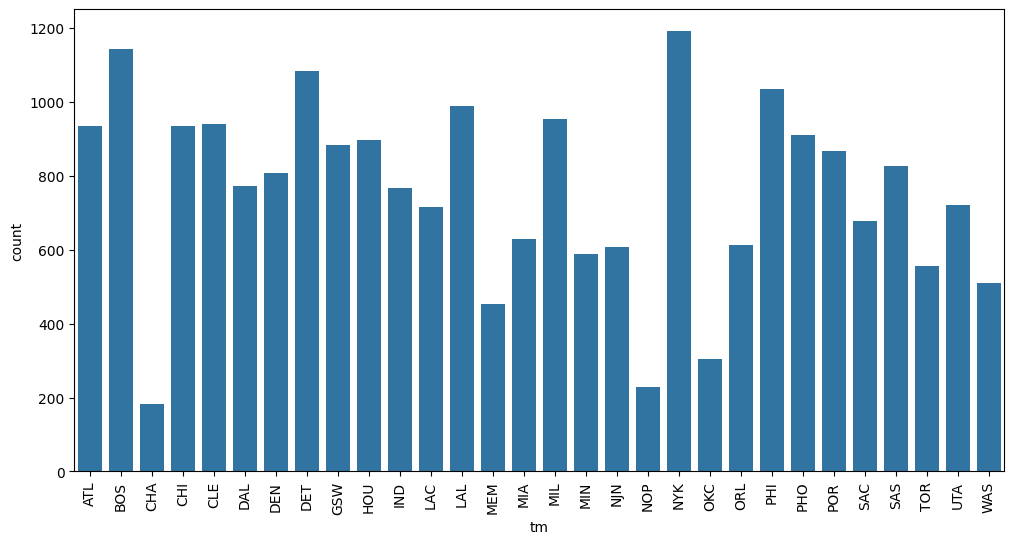

In [138]:
plt.figure(figsize=(12,6))
sns.barplot(df_equipos_filtrados,x='tm',y='count')
plt.xticks(rotation=90)
plt.show()

Este gráfico visualiza los conteos de jugadores que jugaron en estas conferencias, y por lo que se vé, en la conferencia Este pasaron un poco mas de 800 jugadores, en cambio, en el Oeste pasaron en promedio unos 700 jugadores.

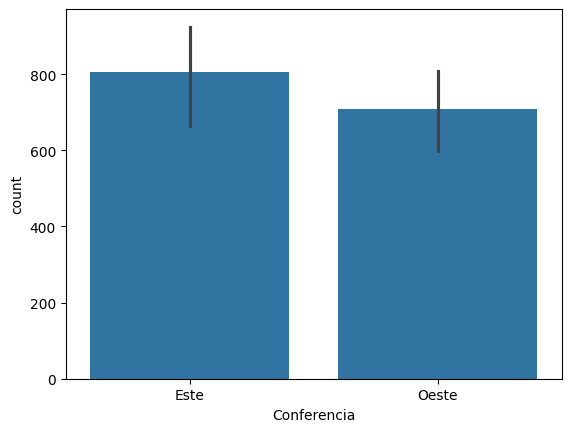

In [139]:
sns.barplot(df_equipos_filtrados,x='Conferencia',y='count')
plt.show()

Gráfico que visualiza el porcentaje de triples de cada equipo, por lo visto, en esta estadística, los New Orleans Pelicans es el equipo que se destaca. y los Brooklin Nets(antes llamados New Jersey Nets) es el equipo con peor porcentaje de triples

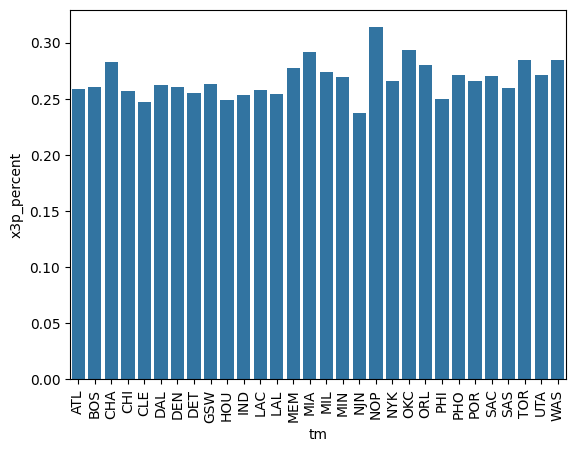

In [140]:
sns.barplot(df_equipos_filtrados,x='tm',y='x3p_percent')
plt.xticks(rotation=90)
plt.show()

Gráfico sobre el porcentaje de tiros de campo, en este gráfico, los San Antonio Spurs son los que se destacan, siendo el único equipo que supera el 45% de tiros de campo. Esto creo yo se puede deber a que su juego es mucho en finalizar cerca del aro, ya que en su historia algunas de sus mayores estrellas son Pivots y Ala-Pivots, como por ejemplo, David Robinson, quien era un jugador estrella de los Spurs que jugaba en la posición de Pivot, y Tim Duncan, quien también era jugador estrella de los Spurs, pero en otra época a la de Robinson, y jugaba de Ala-Pivot.

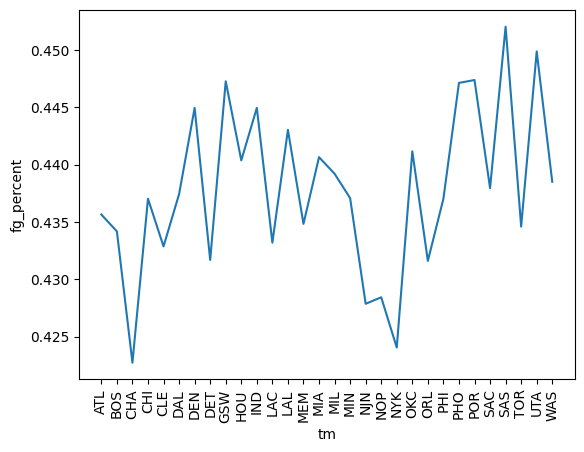

In [144]:
sns.lineplot(df_equipos_filtrados,x='tm',y='fg_percent')
plt.xticks(rotation=90)
plt.show()

Gráfico sobre el porcentaje de tiros libres, En esta visualización, los Utah Jazz son los que se destacan con un 74% de tiro de campo, yo creo que se puede llegar a deber a que tuvieron a uno de los mejores atacantes de una época, y uno de los mayores anotadores de la NBA, el cual es Karl Malone, quien disputó 18 temporadas con este equipo.

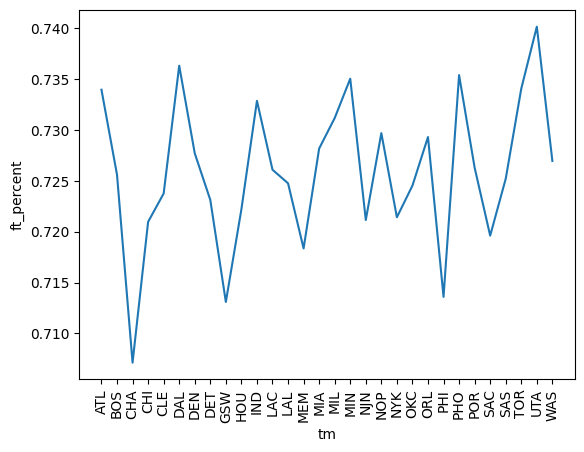

In [143]:
sns.lineplot(df_equipos_filtrados,x='tm',y='ft_percent')
plt.xticks(rotation=90)
plt.show()

Gráfico sobre puntos por equipos, en este apartado los Boston Celtics son los que mayor cantidad de puntos anotaron a lo largo de los años

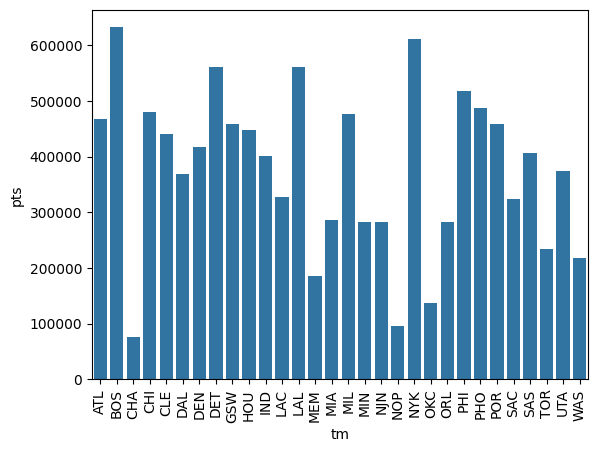

In [119]:
sns.barplot(df_equipos_filtrados,x='tm',y='pts')
plt.xticks(rotation=90)
plt.show()

Gráfico sobre porcentaje de triples por conferencia, en este caso vemos que la conferencia Este tiene mejor porcentaje con respecto al porcentaje de la conferencia Oeste. El outlier que supera el 31% de porcentaje de triples ya lo conocemos, y son los New Orleans Pelicas

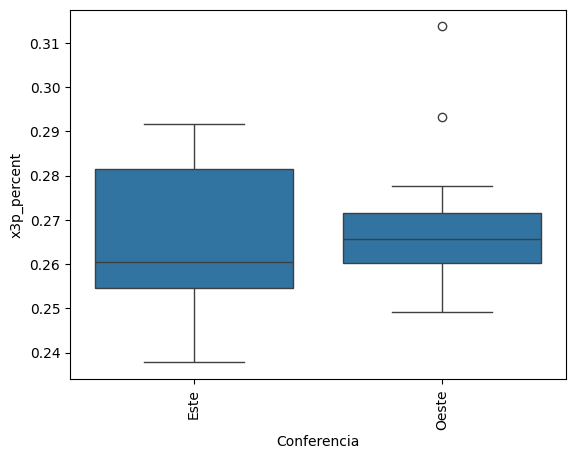

In [109]:
sns.boxplot(df_equipos_filtrados,x='Conferencia',y='x3p_percent')
plt.xticks(rotation=90)
plt.show()

En este gráfico podemos ver que al contrario al porcentaje de triples por conferencia, la conferencia Oeste tiene un mayor porcentaje de tiros de campo que la conferencia Este, viendo el gráfico, podemos ver que el tercer cuartil de la conferencia Este está un poco por encima del primer cuartil de la conferencia Oeste

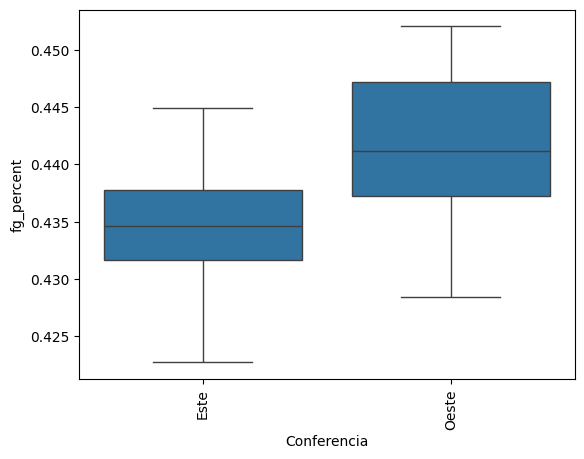

In [110]:
sns.boxplot(df_equipos_filtrados,x='Conferencia',y='fg_percent')
plt.xticks(rotation=90)
plt.show()

En este último gráfico podemos ver que la conferencia Este metió más puntos en estos años que la otra conferencia, viendo además que la media de la conferencia Este está un poco por debajo que el tercer cuartil de la conferencia Oeste 

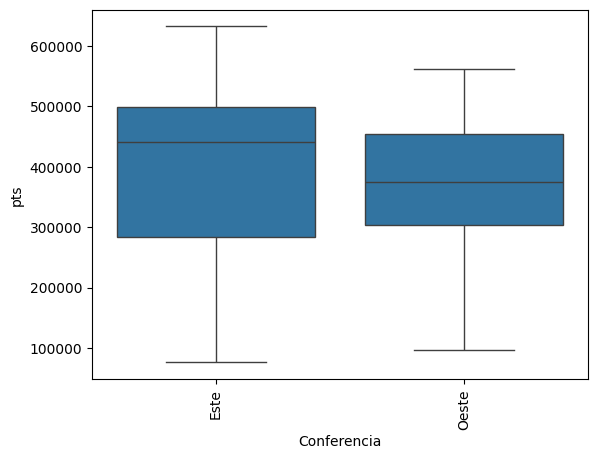

In [147]:
sns.boxplot(df_equipos_filtrados,x='Conferencia',y='pts')
plt.xticks(rotation=90)
plt.show()